<div style="text-align:center;"><h1> Sydney Rainfall prediction - ML classification </div>

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns

In [3]:
import warnings
warnings.filterwarnings("ignore")

In [4]:
pip install openpyxl

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [5]:
df=pd.read_excel('C:/Users/alugo/sydney_rain prediction.xlsx',header=0)

In [6]:
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-02-01,Sydney,19.5,22.4,15.6,6.2,0.0,92.0,84.0,1017.6,1017.4,8.0,8.0,20.7,20.9,Yes,Yes
1,2008-02-02,Sydney,19.5,25.6,6.0,3.4,2.7,83.0,73.0,1017.9,1016.4,7.0,7.0,22.4,24.8,Yes,Yes
2,2008-02-03,Sydney,21.6,24.5,6.6,2.4,0.1,88.0,86.0,1016.7,1015.6,7.0,8.0,23.5,23.0,Yes,Yes
3,2008-02-04,Sydney,20.2,22.8,18.8,2.2,0.0,83.0,90.0,1014.2,1011.8,8.0,8.0,21.4,20.9,Yes,Yes
4,2008-02-05,Sydney,19.7,25.7,77.4,NaN,0.0,88.0,74.0,1008.3,1004.8,8.0,8.0,22.5,25.5,Yes,Yes


In [7]:
df.shape

(3337, 17)

In [8]:
df.isnull().sum()

Date              0
Location          0
MinTemp           3
MaxTemp           2
Rainfall          6
Evaporation      51
Sunshine         16
Humidity9am      14
Humidity3pm      13
Pressure9am      20
Pressure3pm      19
Cloud9am        566
Cloud3pm        561
Temp9am           4
Temp3pm           4
RainToday         6
RainTomorrow      0
dtype: int64

In [9]:
df=pd.get_dummies(df,columns=['RainToday','RainTomorrow'],drop_first=True,dtype=int)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3337 entries, 0 to 3336
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Date              3337 non-null   datetime64[ns]
 1   Location          3337 non-null   object        
 2   MinTemp           3334 non-null   float64       
 3   MaxTemp           3335 non-null   float64       
 4   Rainfall          3331 non-null   float64       
 5   Evaporation       3286 non-null   float64       
 6   Sunshine          3321 non-null   float64       
 7   Humidity9am       3323 non-null   float64       
 8   Humidity3pm       3324 non-null   float64       
 9   Pressure9am       3317 non-null   float64       
 10  Pressure3pm       3318 non-null   float64       
 11  Cloud9am          2771 non-null   float64       
 12  Cloud3pm          2776 non-null   float64       
 13  Temp9am           3333 non-null   float64       
 14  Temp3pm           3333 n

### Replace Null value with Mean value  

In [11]:
# Select only numeric columns
numeric_cols = df.select_dtypes(include='number').columns

# Replace null values with mean for numeric columns
df[numeric_cols] = df[numeric_cols].fillna(df[numeric_cols].mean())

# Fill null values in "RainToday" with the mode
df['RainToday_Yes'].fillna(df['RainToday_Yes'].mode()[0], inplace=True)

In [12]:
numeric_cols

Index(['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine',
       'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am',
       'Cloud3pm', 'Temp9am', 'Temp3pm', 'RainToday_Yes', 'RainTomorrow_Yes'],
      dtype='object')

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3337 entries, 0 to 3336
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Date              3337 non-null   datetime64[ns]
 1   Location          3337 non-null   object        
 2   MinTemp           3337 non-null   float64       
 3   MaxTemp           3337 non-null   float64       
 4   Rainfall          3337 non-null   float64       
 5   Evaporation       3337 non-null   float64       
 6   Sunshine          3337 non-null   float64       
 7   Humidity9am       3337 non-null   float64       
 8   Humidity3pm       3337 non-null   float64       
 9   Pressure9am       3337 non-null   float64       
 10  Pressure3pm       3337 non-null   float64       
 11  Cloud9am          3337 non-null   float64       
 12  Cloud3pm          3337 non-null   float64       
 13  Temp9am           3337 non-null   float64       
 14  Temp3pm           3337 n

In [14]:
df.isnull().sum()

Date                0
Location            0
MinTemp             0
MaxTemp             0
Rainfall            0
Evaporation         0
Sunshine            0
Humidity9am         0
Humidity3pm         0
Pressure9am         0
Pressure3pm         0
Cloud9am            0
Cloud3pm            0
Temp9am             0
Temp3pm             0
RainToday_Yes       0
RainTomorrow_Yes    0
dtype: int64

In [15]:
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday_Yes,RainTomorrow_Yes
0,2008-02-01,Sydney,19.5,22.4,15.6,6.200000,0.0,92.0,84.0,1017.6,1017.4,8.0,8.0,20.7,20.9,1,1
1,2008-02-02,Sydney,19.5,25.6,6.0,3.400000,2.7,83.0,73.0,1017.9,1016.4,7.0,7.0,22.4,24.8,1,1
2,2008-02-03,Sydney,21.6,24.5,6.6,2.400000,0.1,88.0,86.0,1016.7,1015.6,7.0,8.0,23.5,23.0,1,1
3,2008-02-04,Sydney,20.2,22.8,18.8,2.200000,0.0,83.0,90.0,1014.2,1011.8,8.0,8.0,21.4,20.9,1,1
4,2008-02-05,Sydney,19.7,25.7,77.4,5.187432,0.0,88.0,74.0,1008.3,1004.8,8.0,8.0,22.5,25.5,1,1


In [16]:
df.describe()

,Date,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday_Yes,RainTomorrow_Yes
count,3337,3337.000000,3337.000000,3337.000000,3337.000000,3337.000000,3337.000000,3337.000000,3337.000000,3337.000000,3337.000000,3337.000000,3337.000000,3337.000000,3337.000000,3337.000000
mean,2012-10-16 01:24:34.737788672,14.865057,23.002339,3.330231,5.187432,7.179374,68.229010,54.699158,1018.346156,1016.018774,4.181523,4.218660,17.819742,21.533333,0.259515,0.259215
min,2008-02-01 00:00:00,4.300000,11.700000,0.000000,0.000000,0.000000,19.000000,10.000000,986.700000,989.800000,0.000000,0.000000,6.400000,10.200000,0.000000,0.000000
25%,2010-05-15 00:00:00,11.000000,19.600000,0.000000,3.200000,4.300000,58.000000,44.000000,1013.800000,1011.300000,2.000000,2.000000,13.800000,18.400000,0.000000,0.000000
50%,2012-09-28 00:00:00,14.900000,22.800000,0.000000,4.800000,8.200000,69.000000,56.000000,1018.500000,1016.300000,4.181523,4.218660,18.200000,21.300000,0.000000,0.000000
75%,2015-03-14 00:00:00,18.700000,26.000000,1.400000,7.000000,10.200000,80.000000,64.000000,1023.100000,1020.800000,7.000000,7.000000,21.700000,24.500000,1.000000,1.000000
max,2017-06-25 00:00:00,27.600000,45.800000,119.400000,18.400000,13.600000,100.000000,99.000000,1039.000000,1036.700000,9.000000,8.000000,36.500000,44.700000,1.000000,1.000000
std,NaN,4.551593,4.493290,9.886270,2.756095,3.801737,15.053668,16.261752,7.000492,7.012157,2.505491,2.409531,4.894240,4.301156,0.438434,0.438269


# Check For Outliers 

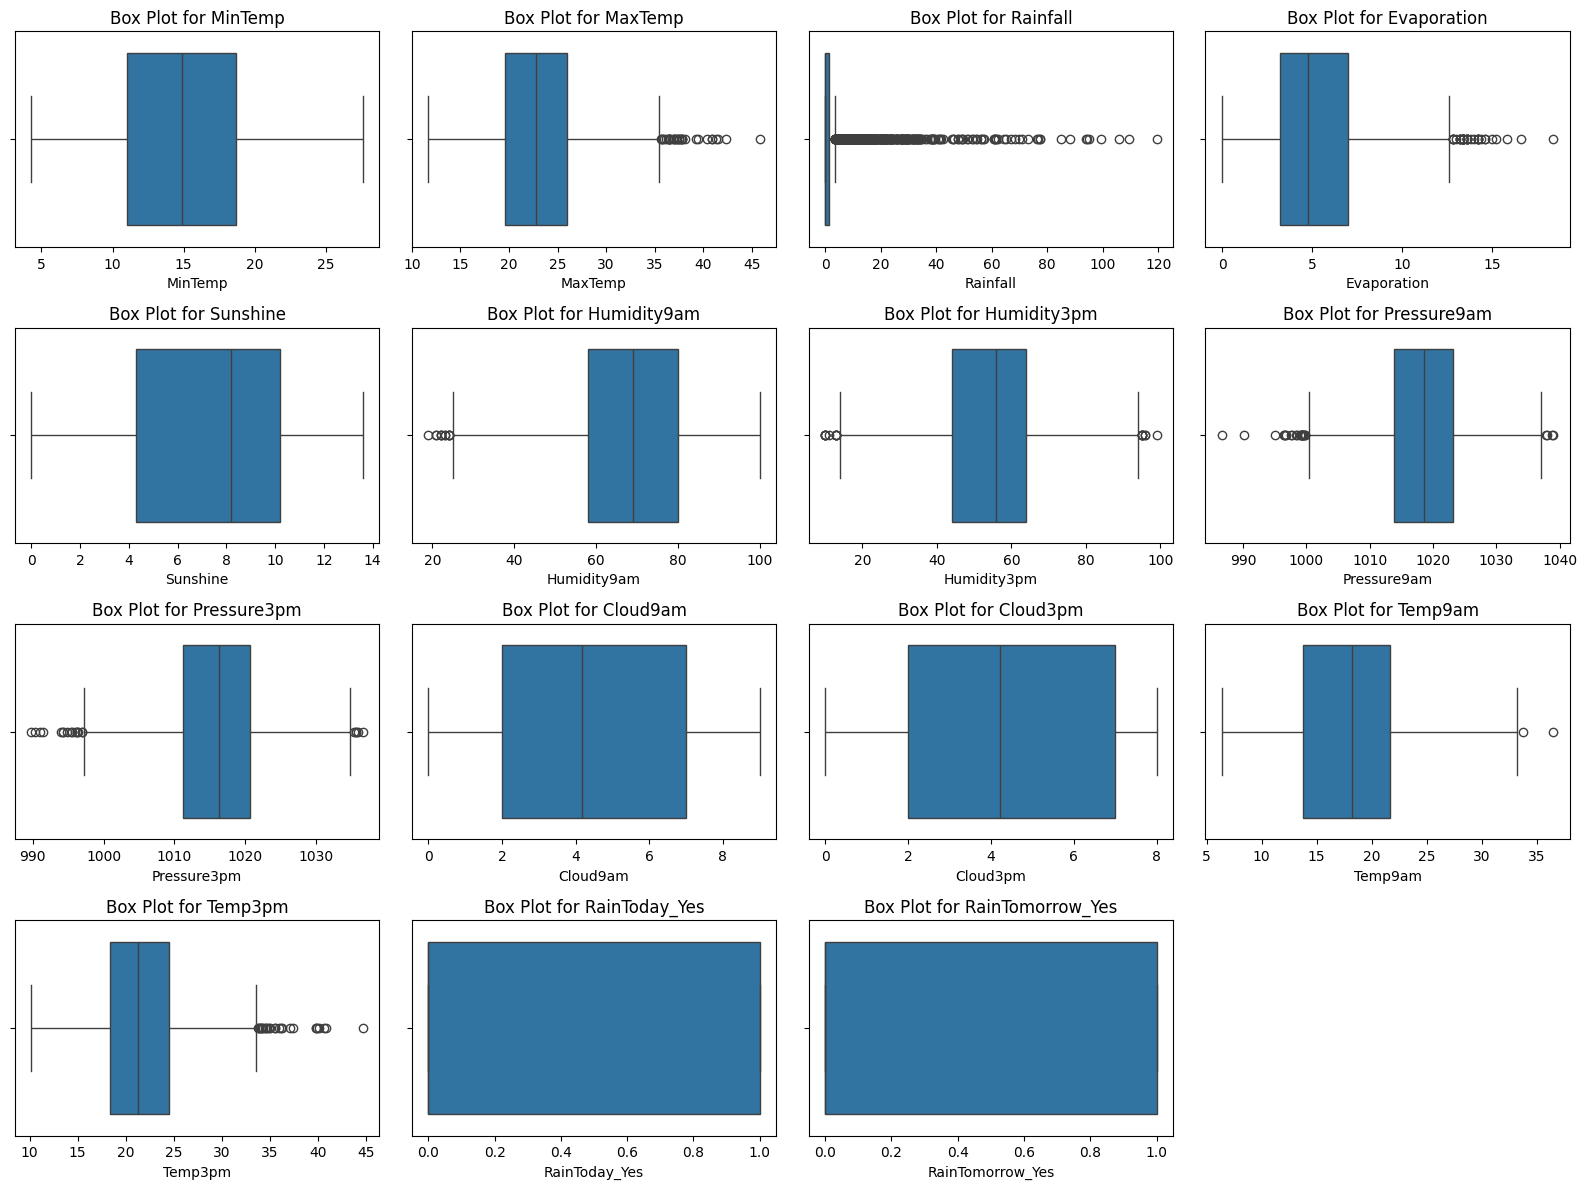

In [54]:
import matplotlib.pyplot as plt
import seaborn as sns

# Select numeric columns for box plots
numeric_cols = df.select_dtypes(include='number').columns

# Create box plots for each numeric column
plt.figure(figsize=(16, 12))
for i, col in enumerate(numeric_cols, 1):
    plt.subplot(4, 4, i)
    sns.boxplot(x=df[col])
    plt.title(f'Box Plot for {col}')

plt.tight_layout()
plt.show()

### Outliers for max_temp 

In [18]:
upper_limit = np.percentile(df.MaxTemp, [99])[0]

In [19]:
df[(df.MaxTemp > 3*upper_limit)]

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday_Yes,RainTomorrow_Yes


In [20]:
df.MaxTemp[(df.MaxTemp > 3*upper_limit)] = 3*upper_limit

<Axes: ylabel='MaxTemp'>

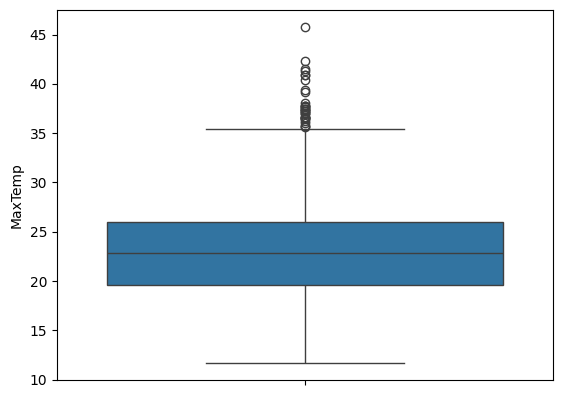

In [21]:
sns.boxplot(df['MaxTemp'])

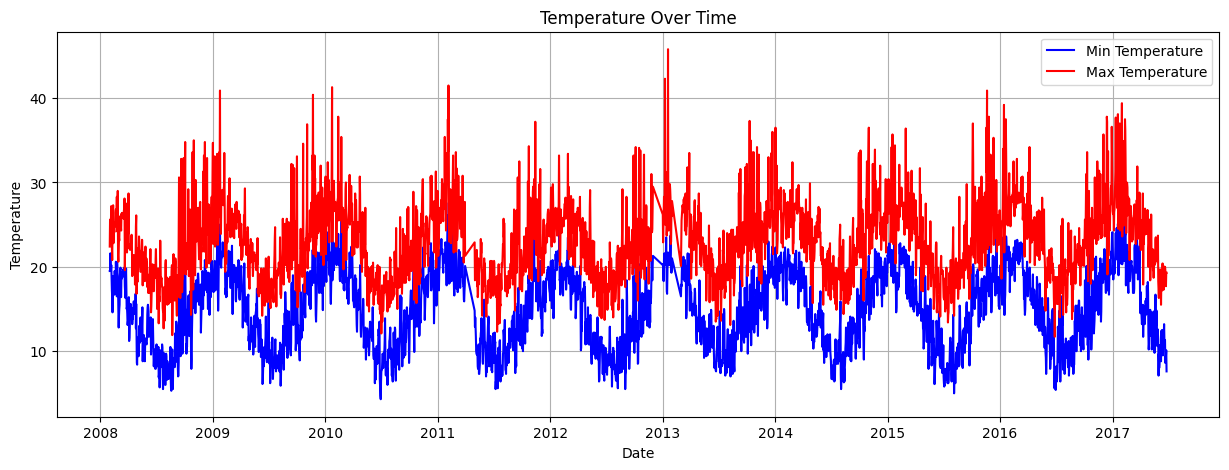

In [22]:
plt.figure(figsize=(15, 5))
plt.plot(df['Date'], df['MinTemp'], label='Min Temperature', color='blue')  # Label added here
plt.plot(df['Date'], df['MaxTemp'], label='Max Temperature', color='red')   # Label added here
plt.legend()
plt.grid()
plt.title('Temperature Over Time')
plt.xlabel('Date')
plt.ylabel('Temperature')
plt.show()


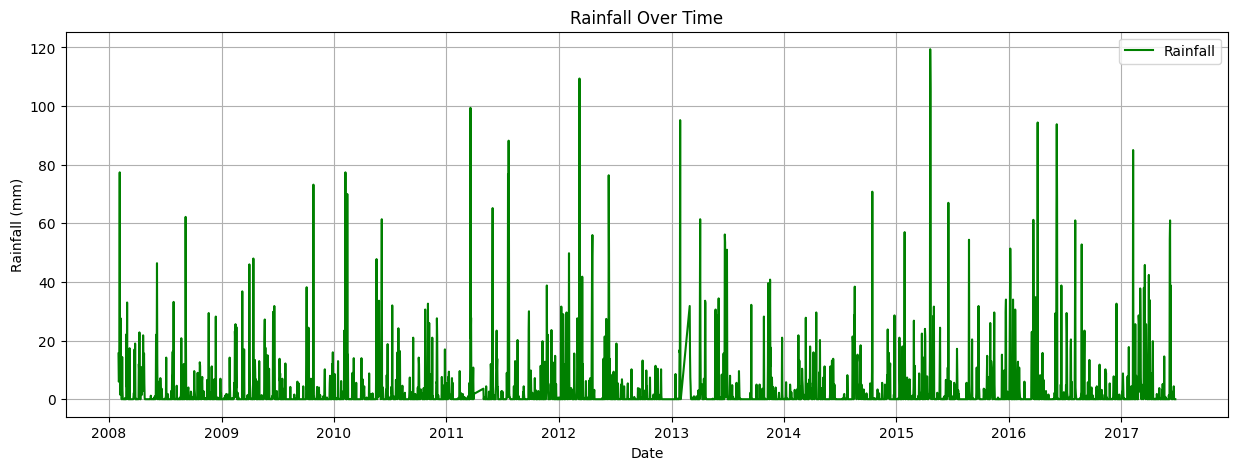

In [23]:
plt.figure(figsize = (15,5))
fig = plt.plot(df['Date'], df['Rainfall'], label='Rainfall', color='green')
plt.title('Rainfall Over Time')
plt.xlabel('Date')
plt.ylabel('Rainfall (mm)')
plt.legend()
plt.grid();
plt.show();

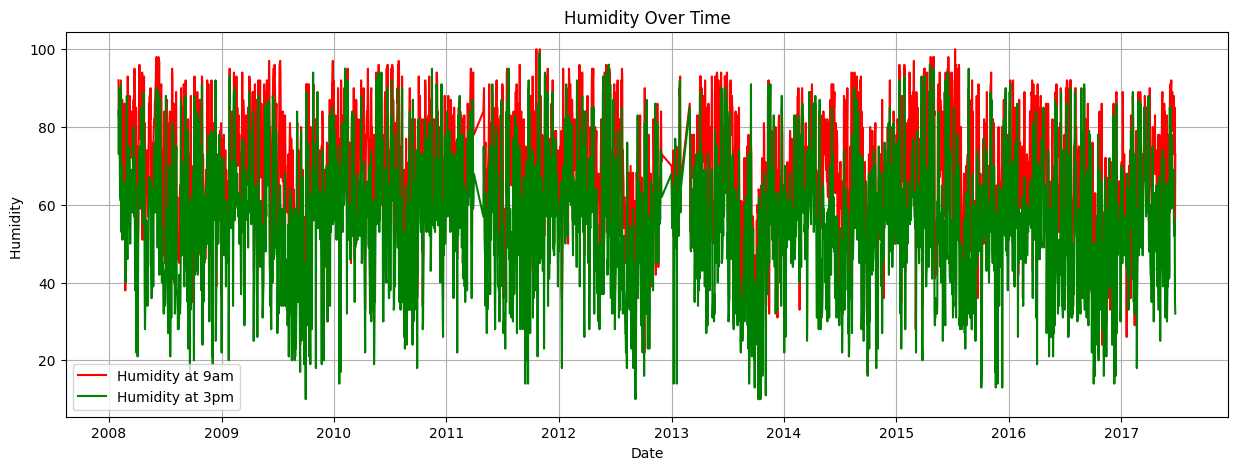

In [24]:
plt.figure(figsize = (15,5))
plt.plot(df['Date'], df['Humidity9am'], label='Humidity at 9am', color='red')
plt.plot(df['Date'], df['Humidity3pm'], label='Humidity at 3pm', color='green')
plt.title('Humidity Over Time')
plt.xlabel('Date')
plt.ylabel('Humidity ')

# Adding legend
plt.legend()
plt.grid();
plt.show();

## Train-Test Split 

In [25]:
x_multi = df.drop(['RainTomorrow_Yes','Date', 'Location'], axis=1)
y_multi = df['RainTomorrow_Yes']

from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x_multi, y_multi, test_size=0.2, random_state=42)

## Training Classification Tree 

In [26]:
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score, precision_score, recall_score
from sklearn.model_selection import GridSearchCV

In [27]:
clftree = tree.DecisionTreeClassifier(max_depth = 3)
clftree.fit(x_train,y_train)

#Predict Values 

y_train_pred = clftree.predict(x_train)
y_test_pred = clftree.predict(x_test)

#Model Performance 


cfm_train_ct = confusion_matrix(y_train, y_train_pred)
cfm_test_ct = confusion_matrix(y_test, y_test_pred)
acs_train_ct = accuracy_score(y_train, y_train_pred)
acs_test_ct = accuracy_score(y_test, y_test_pred)
pcs_train_ct = precision_score(y_train, y_train_pred)
pcs_test_ct = precision_score(y_test, y_test_pred)
rcs_train_ct = recall_score(y_train, y_train_pred)
rcs_test_ct = recall_score(y_test, y_test_pred)
roc_auc_score_train = roc_auc_score(y_train, y_train_pred)
roc_auc_score_test = roc_auc_score(y_test,y_test_pred)

#Print the result 
# Print the confusion matrix and accuracy score for training data
print("Confusion Matrix (Training Data):")
print(cfm_train_ct)

print("\nAccuracy Score (Training Data):", acs_train_ct)
print("\nPrecision Score (Training Data):", pcs_train_ct)
print("\nRecall Score (Training Data):", rcs_train_ct)
print("\nROC AUC Score (Training Data):", roc_auc_score_train)

print("\n------------------------------------------------------")
# Print the confusion matrix and accuracy score for testing data
print("\nConfusion Matrix (Testing Data):")
print(cfm_test_ct)

print("\nAccuracy Score (Testing Data):", acs_test_ct)
print("\nPrecision Score (Test Data):", pcs_test_ct)
print("\nRecall Score (Test Data):", rcs_test_ct)
print("\nROC AUC Score (Test Data):", roc_auc_score_test)
print("\n------------------------------------------------------")


Confusion Matrix (Training Data):
[[1815  173]
 [ 288  393]]

Accuracy Score (Training Data): 0.8272761333832896

Precision Score (Training Data): 0.6943462897526502

Recall Score (Training Data): 0.5770925110132159

ROC AUC Score (Training Data): 0.7450351891082176

------------------------------------------------------

Confusion Matrix (Testing Data):
[[430  54]
 [ 78 106]]

Accuracy Score (Testing Data): 0.8023952095808383

Precision Score (Test Data): 0.6625

Recall Score (Test Data): 0.5760869565217391

ROC AUC Score (Test Data): 0.7322583542939275

------------------------------------------------------


## Bagging  

In [28]:
from sklearn.ensemble import BaggingClassifier

# Define the base Decision Tree model
base_tree = tree.DecisionTreeClassifier(max_depth=3)

# Create a BaggingClassifier
bagging_clf = BaggingClassifier(estimator=base_tree, random_state=42)

# Define the parameter grid for GridSearchCV
param_grid = {
    'n_estimators': [10, 50, 100]
}

# Perform GridSearchCV
grid_search = GridSearchCV(bagging_clf, param_grid, cv=3, scoring='accuracy')
grid_search.fit(x_train, y_train)

# Get the best parameters and model
best_params = grid_search.best_params_
best_bagging_clf = grid_search.best_estimator_

# Predict values using the best model
y_train_pred_bagging = best_bagging_clf.predict(x_train)
y_test_pred_bagging = best_bagging_clf.predict(x_test)


# Model Performance
cfm_train_bagging = confusion_matrix(y_train, y_train_pred_bagging)
cfm_test_bagging = confusion_matrix(y_test, y_test_pred_bagging)
acs_train_bagging = accuracy_score(y_train, y_train_pred_bagging)
acs_test_bagging = accuracy_score(y_test, y_test_pred_bagging)
pcs_train_bagging = precision_score(y_train, y_train_pred_bagging)
pcs_test_bagging = precision_score(y_test, y_test_pred_bagging)
rcs_train_bagging = recall_score(y_train, y_train_pred_bagging)
rcs_test_bagging = recall_score(y_test, y_test_pred_bagging)
roc_auc_score_train_bagging = roc_auc_score(y_train, y_train_pred_bagging)
roc_auc_score_test_bagging = roc_auc_score(y_test, y_test_pred_bagging)

# Print the results for Bagging Classifier
print("Best Hyperparameter:", best_params)
print("Bagging Classifier Results:")
print("Confusion Matrix (Training Data):")
print(cfm_train_bagging)
print("\nAccuracy Score (Training Data):", acs_train_bagging)
print("\nPrecision Score (Training Data):", pcs_train_bagging)
print("\nRecall Score (Training Data):", rcs_train_bagging)
print("\nROC AUC Score (Training Data):", roc_auc_score_train_bagging)
print("\n------------------------------------------------------")
print("\nConfusion Matrix (Testing Data):")
print(cfm_test_bagging)
print("\nAccuracy Score (Testing Data):", acs_test_bagging)
print("\nPrecision Score (Test Data):", pcs_test_bagging)
print("\nRecall Score (Test Data):", rcs_test_bagging)
print("\nROC AUC Score (Test Data):", roc_auc_score_test_bagging)
print("\n------------------------------------------------------")

Best Hyperparameter: {'n_estimators': 10}
Bagging Classifier Results:
Confusion Matrix (Training Data):
[[1923   65]
 [ 357  324]]

Accuracy Score (Training Data): 0.8418883476957663

Precision Score (Training Data): 0.8329048843187661

Recall Score (Training Data): 0.47577092511013214

ROC AUC Score (Training Data): 0.7215373740238789

------------------------------------------------------

Confusion Matrix (Testing Data):
[[462  22]
 [ 97  87]]

Accuracy Score (Testing Data): 0.8218562874251497

Precision Score (Test Data): 0.7981651376146789

Recall Score (Test Data): 0.47282608695652173

ROC AUC Score (Test Data): 0.7136857707509882

------------------------------------------------------


## Random Forest  

In [29]:
from sklearn.ensemble import RandomForestClassifier

# Create a Random Forest Classifier
rf_classifier = RandomForestClassifier(random_state=42)

# Define the parameter grid for GridSearchCV
param_grid = {
    'n_estimators': [50, 200],
    'max_depth': [10, 20],
    'min_samples_split': [ 5, 10],
    'min_samples_leaf': [1, 4],
}

# Perform GridSearchCV
grid_search_rf = GridSearchCV(rf_classifier, param_grid, cv=3, scoring='accuracy')
grid_search_rf.fit(x_train, y_train)

# Get the best parameters and model
best_params_rf = grid_search_rf.best_params_
best_rf_classifier = grid_search_rf.best_estimator_

# Predict values using the best model
y_train_pred_rf = best_rf_classifier.predict(x_train)
y_test_pred_rf = best_rf_classifier.predict(x_test)

# Model Performance
cfm_train_rf = confusion_matrix(y_train, y_train_pred_rf)
cfm_test_rf = confusion_matrix(y_test, y_test_pred_rf)
acs_train_rf = accuracy_score(y_train, y_train_pred_rf)
acs_test_rf = accuracy_score(y_test, y_test_pred_rf)
pcs_train_rf = precision_score(y_train, y_train_pred_rf)
pcs_test_rf = precision_score(y_test, y_test_pred_rf)
rcs_train_rf = recall_score(y_train, y_train_pred_rf)
rcs_test_rf = recall_score(y_test, y_test_pred_rf)
roc_auc_score_train_rf = roc_auc_score(y_train, y_train_pred_rf)
roc_auc_score_test_rf = roc_auc_score(y_test, y_test_pred_rf)

# Print the results for Random Forest Classifier
print("Random Forest Classifier Results:")
print("Confusion Matrix (Training Data):")
print(cfm_train_rf)
print("\nAccuracy Score (Training Data):", acs_train_rf)
print("\nPrecision Score (Training Data):", pcs_train_rf)
print("\nRecall Score (Training Data):", rcs_train_rf)
print("\nROC AUC Score (Training Data):", roc_auc_score_train_rf)
print("\n------------------------------------------------------")
print("\nConfusion Matrix (Testing Data):")
print(cfm_test_rf)
print("\nAccuracy Score (Testing Data):", acs_test_rf)
print("\nPrecision Score (Test Data):", pcs_test_rf)
print("\nRecall Score (Test Data):", rcs_test_rf)
print("\nROC AUC Score (Test Data):", roc_auc_score_test_rf)
print("\n------------------------------------------------------")

Random Forest Classifier Results:
Confusion Matrix (Training Data):
[[1955   33]
 [ 197  484]]

Accuracy Score (Training Data): 0.913825402772574

Precision Score (Training Data): 0.9361702127659575

Recall Score (Training Data): 0.71071953010279

ROC AUC Score (Training Data): 0.8470599662586384

------------------------------------------------------

Confusion Matrix (Testing Data):
[[452  32]
 [ 85  99]]

Accuracy Score (Testing Data): 0.8248502994011976

Precision Score (Test Data): 0.7557251908396947

Recall Score (Test Data): 0.5380434782608695

ROC AUC Score (Test Data): 0.7359638878907654

------------------------------------------------------


In [30]:
print("best hyperparameter: ", best_params_rf)

best hyperparameter:  {'max_depth': 20, 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 200}


## Gradient Boosting  

In [31]:
from sklearn.ensemble import GradientBoostingClassifier

# Create a Gradient Boosting Classifier
gb_classifier = GradientBoostingClassifier(random_state=42)

# Define the parameter grid for GridSearchCV
param_grid_gb = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
}

# Perform GridSearchCV
grid_search_gb = GridSearchCV(gb_classifier, param_grid_gb, cv=3, scoring='accuracy')
grid_search_gb.fit(x_train, y_train)

# Get the best parameters and model
best_params_gb = grid_search_gb.best_params_
best_gb_classifier = grid_search_gb.best_estimator_

# Predict values using the best model
y_train_pred_gb = best_gb_classifier.predict(x_train)
y_test_pred_gb = best_gb_classifier.predict(x_test)

# Model Performance
cfm_train_gb = confusion_matrix(y_train, y_train_pred_gb)
cfm_test_gb = confusion_matrix(y_test, y_test_pred_gb)
acs_train_gb = accuracy_score(y_train, y_train_pred_gb)
acs_test_gb = accuracy_score(y_test, y_test_pred_gb)
pcs_train_gb = precision_score(y_train, y_train_pred_gb)
pcs_test_gb = precision_score(y_test, y_test_pred_gb)
rcs_train_gb = recall_score(y_train, y_train_pred_gb)
rcs_test_gb = recall_score(y_test, y_test_pred_gb)
roc_auc_score_train_gb = roc_auc_score(y_train, y_train_pred_gb)
roc_auc_score_test_gb = roc_auc_score(y_test, y_test_pred_gb)


# Print the results for Gradient Boosting Classifier
print("Gradient Boosting Classifier Results:")
print("Confusion Matrix (Training Data):")
print(cfm_train_gb)
print("\nAccuracy Score (Training Data):", acs_train_gb)
print("\nPrecision Score (Training Data):", pcs_train_gb)
print("\nRecall Score (Training Data):", rcs_train_gb)
print("\nROC AUC Score (Training Data):", roc_auc_score_train_gb)
print("\n------------------------------------------------------")
print("\nConfusion Matrix (Testing Data):")
print(cfm_test_gb)
print("\nAccuracy Score (Testing Data):", acs_test_gb)
print("\nPrecision Score (Testing Data):", pcs_test_gb)
print("\nRecall Score (Testing Data):", rcs_test_gb)
print("\nROC AUC Score (Testing Data):", roc_auc_score_test_gb)
print("\n------------------------------------------------------")


Gradient Boosting Classifier Results:
Confusion Matrix (Training Data):
[[1967   21]
 [ 196  485]]

Accuracy Score (Training Data): 0.9186961408767329

Precision Score (Training Data): 0.958498023715415

Recall Score (Training Data): 0.7121879588839941

ROC AUC Score (Training Data): 0.8508122893011519

------------------------------------------------------

Confusion Matrix (Testing Data):
[[443  41]
 [ 81 103]]

Accuracy Score (Testing Data): 0.8173652694610778

Precision Score (Testing Data): 0.7152777777777778

Recall Score (Testing Data): 0.5597826086956522

ROC AUC Score (Testing Data): 0.7375359324469997

------------------------------------------------------


In [32]:
print("best hyperparameter: ", best_params_gb)

best hyperparameter:  {'learning_rate': 0.1, 'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 50}


## ADA boost 

In [33]:
from sklearn.ensemble import AdaBoostClassifier

# Create a base classifier (e.g., Decision Tree)
base_classifier = tree.DecisionTreeClassifier(max_depth=1)

# Create an AdaBoost Classifier
adaboost_classifier = AdaBoostClassifier(base_classifier, random_state=42)

# Define the parameter grid for GridSearchCV
param_grid_adaboost = {
    'n_estimators': [50,  200],
    'learning_rate': [0.01, 0.1, 0.2],
}

# Perform GridSearchCV
grid_search_adaboost = GridSearchCV(adaboost_classifier, param_grid_adaboost, cv=3, scoring='accuracy')
grid_search_adaboost.fit(x_train, y_train)

# Get the best parameters and model
best_params_adaboost = grid_search_adaboost.best_params_
best_adaboost_classifier = grid_search_adaboost.best_estimator_

# Predict values using the best model
y_train_pred_adaboost = best_adaboost_classifier.predict(x_train)
y_test_pred_adaboost = best_adaboost_classifier.predict(x_test)

# Model Performance
cfm_train_adaboost = confusion_matrix(y_train, y_train_pred_adaboost)
cfm_test_adaboost = confusion_matrix(y_test, y_test_pred_adaboost)
acs_train_adaboost = accuracy_score(y_train, y_train_pred_adaboost)
acs_test_adaboost = accuracy_score(y_test, y_test_pred_adaboost)
pcs_train_adaboost = precision_score(y_train, y_train_pred_adaboost)
pcs_test_adaboost = precision_score(y_test, y_test_pred_adaboost)
rcs_train_adaboost = recall_score(y_train, y_train_pred_adaboost)
rcs_test_adaboost = recall_score(y_test, y_test_pred_adaboost)
roc_auc_score_train_adaboost = roc_auc_score(y_train, y_train_pred_adaboost)
roc_auc_score_test_adaboost = roc_auc_score(y_test, y_test_pred_adaboost)

# Print the results for AdaBoost Classifier
print("AdaBoost Classifier Results:")
print("Confusion Matrix (Training Data):")
print(cfm_train_adaboost)
print("\nAccuracy Score (Training Data):", acs_train_adaboost)
print("\nPrecision Score (Training Data):", pcs_train_adaboost)
print("\nRecall Score (Training Data):", rcs_train_adaboost)
print("\nROC AUC Score (Training Data):", roc_auc_score_train_adaboost)
print("\n------------------------------------------------------")
print("\nConfusion Matrix (Testing Data):")
print(cfm_test_adaboost)
print("\nAccuracy Score (Testing Data):", acs_test_adaboost)
print("\nPrecision Score (Testing Data):", pcs_test_adaboost)
print("\nRecall Score (Testing Data):", rcs_test_adaboost)
print("\nROC AUC Score (Testing Data):", roc_auc_score_test_adaboost)
print("\n------------------------------------------------------")

AdaBoost Classifier Results:
Confusion Matrix (Training Data):
[[1908   80]
 [ 335  346]]

Accuracy Score (Training Data): 0.8445110528287748

Precision Score (Training Data): 0.812206572769953

Recall Score (Training Data): 0.5080763582966226

ROC AUC Score (Training Data): 0.7339174548022347

------------------------------------------------------

Confusion Matrix (Testing Data):
[[458  26]
 [ 91  93]]

Accuracy Score (Testing Data): 0.8248502994011976

Precision Score (Testing Data): 0.7815126050420168

Recall Score (Testing Data): 0.5054347826086957

ROC AUC Score (Testing Data): 0.7258578871721164

------------------------------------------------------


In [34]:
print("best hyperparameter: ", best_params_adaboost)

best hyperparameter:  {'learning_rate': 0.1, 'n_estimators': 200}


## XG boost  

In [35]:
from xgboost import XGBClassifier

# Create an XGBoost Classifier
xgb_classifier = XGBClassifier(random_state=42)

# Define the parameter grid for GridSearchCV
param_grid_xgb = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'min_child_weight': [1, 3, 5],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0],
}

# Perform GridSearchCV
grid_search_xgb = GridSearchCV(xgb_classifier, param_grid_xgb, cv=3, scoring='accuracy')
grid_search_xgb.fit(x_train, y_train)

# Get the best parameters and model
best_params_xgb = grid_search_xgb.best_params_
best_xgb_classifier = grid_search_xgb.best_estimator_

# Predict values using the best model
y_train_pred_xgb = best_xgb_classifier.predict(x_train)
y_test_pred_xgb = best_xgb_classifier.predict(x_test)

# Model Performance
cfm_train_xgb = confusion_matrix(y_train, y_train_pred_xgb)
cfm_test_xgb = confusion_matrix(y_test, y_test_pred_xgb)
acs_train_xgb = accuracy_score(y_train, y_train_pred_xgb)
acs_test_xgb = accuracy_score(y_test, y_test_pred_xgb)
pcs_train_xgb = precision_score(y_train, y_train_pred_xgb)
pcs_test_xgb = precision_score(y_test, y_test_pred_xgb)
rcs_train_xgb = recall_score(y_train, y_train_pred_xgb)
rcs_test_xgb = recall_score(y_test, y_test_pred_xgb)
roc_auc_score_train_xgb = roc_auc_score(y_train, y_train_pred_xgb)
roc_auc_score_test_xgb = roc_auc_score(y_test, y_test_pred_xgb)

# Print the results for XGBoost Classifier
print("XGBoost Classifier Results:")
print("Confusion Matrix (Training Data):")
print(cfm_train_xgb)
print("\nAccuracy Score (Training Data):", acs_train_xgb)
print("\nPrecision Score (Training Data):", pcs_train_xgb)
print("\nRecall Score (Training Data):", rcs_train_xgb)
print("\nROC AUC Score (Training Data):", roc_auc_score_train_xgb)
print("\n------------------------------------------------------")
print("\nConfusion Matrix (Testing Data):")
print(cfm_test_xgb)
print("\nAccuracy Score (Testing Data):", acs_test_xgb)
print("\nPrecision Score (Testing Data):", pcs_test_xgb)
print("\nRecall Score (Testing Data):", rcs_test_xgb)
print("\nROC AUC Score (Testing Data):", roc_auc_score_test_xgb)
print("\n------------------------------------------------------")

XGBoost Classifier Results:
Confusion Matrix (Training Data):
[[1903   85]
 [ 270  411]]

Accuracy Score (Training Data): 0.8669913825402773

Precision Score (Training Data): 0.8286290322580645

Recall Score (Training Data): 0.6035242290748899

ROC AUC Score (Training Data): 0.7803838449197387

------------------------------------------------------

Confusion Matrix (Testing Data):
[[451  33]
 [ 80 104]]

Accuracy Score (Testing Data): 0.8308383233532934

Precision Score (Testing Data): 0.7591240875912408

Recall Score (Testing Data): 0.5652173913043478

ROC AUC Score (Testing Data): 0.7485177865612648

------------------------------------------------------


In [36]:
print("best hyperparameter: ", best_params_xgb)

best hyperparameter:  {'colsample_bytree': 0.8, 'learning_rate': 0.2, 'max_depth': 3, 'min_child_weight': 3, 'n_estimators': 50, 'subsample': 0.8}


## Logistic Regression 

In [37]:
from sklearn.linear_model import LogisticRegression


# Create a Logistic Regression model
logreg_model = LogisticRegression(random_state=42)

# Define the parameter grid for GridSearchCV
param_grid_logreg = {
    'penalty': ['l1', 'l2'],
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
}

# Perform GridSearchCV
grid_search_logreg = GridSearchCV(logreg_model, param_grid_logreg, cv=3, scoring='accuracy')
grid_search_logreg.fit(x_train, y_train)

# Get the best parameters and model
best_params_logreg = grid_search_logreg.best_params_
best_logreg_model = grid_search_logreg.best_estimator_

# Predict values using the best model
y_train_pred_lr= best_logreg_model.predict(x_train)
y_test_pred_lr = best_logreg_model.predict(x_test)

# Model Performance
cfm_train_lr = confusion_matrix(y_train, y_train_pred_lr)
cfm_test_lr = confusion_matrix(y_test, y_test_pred_lr)
acs_train_lr = accuracy_score(y_train, y_train_pred_lr)
acs_test_lr = accuracy_score(y_test, y_test_pred_lr)
pcs_train_lr = precision_score(y_train, y_train_pred_lr)
pcs_test_lr = precision_score(y_test, y_test_pred_lr)
rcs_train_lr = recall_score(y_train, y_train_pred_lr)
rcs_test_lr = recall_score(y_test, y_test_pred_lr)
roc_auc_score_train_lr = roc_auc_score(y_train, y_train_pred_lr)
roc_auc_score_test_lr = roc_auc_score(y_test, y_test_pred_lr)

# Print the results for Logistic Regression Model
print("Logistic Regression Results:")
print("Confusion Matrix (Training Data):")
print(cfm_train_lr)
print("\nAccuracy Score (Training Data):", acs_train_lr)
print("\nPrecision Score (Training Data):", pcs_train_lr)
print("\nRecall Score (Training Data):", rcs_train_lr)
print("\nROC AUC Score (Training Data):", roc_auc_score_train_lr)
print("\n------------------------------------------------------")
print("\nConfusion Matrix (Testing Data):")
print(cfm_test_lr)
print("\nAccuracy Score (Testing Data):", acs_test_lr)
print("\nPrecision Score (Testing Data):", pcs_test_lr)
print("\nRecall Score (Testing Data):", rcs_test_lr)
print("\nROC AUC Score (Testing Data):", roc_auc_score_test_lr)
print("\n------------------------------------------------------")

Logistic Regression Results:
Confusion Matrix (Training Data):
[[1877  111]
 [ 321  360]]

Accuracy Score (Training Data): 0.8381416260771825

Precision Score (Training Data): 0.7643312101910829

Recall Score (Training Data): 0.5286343612334802

ROC AUC Score (Training Data): 0.736399675586559

------------------------------------------------------

Confusion Matrix (Testing Data):
[[451  33]
 [ 89  95]]

Accuracy Score (Testing Data): 0.8173652694610778

Precision Score (Testing Data): 0.7421875

Recall Score (Testing Data): 0.5163043478260869

ROC AUC Score (Testing Data): 0.7240612648221344

------------------------------------------------------


In [38]:
print("best hyperparameter: ", best_params_logreg)

best hyperparameter:  {'C': 0.001, 'penalty': 'l2'}


## KNN 

In [39]:
from sklearn.neighbors import KNeighborsClassifier

# Create a KNN Classifier
knn_classifier = KNeighborsClassifier()

# Define the parameter grid for GridSearchCV
param_grid_knn = {
    'n_neighbors': [3, 5, 7]
}

# Perform GridSearchCV
grid_search_knn = GridSearchCV(knn_classifier, param_grid_knn, cv=3, scoring='accuracy')
grid_search_knn.fit(x_train, y_train)

# Get the best parameters and model
best_params_knn = grid_search_knn.best_params_
best_knn_classifier = grid_search_knn.best_estimator_

# Predict values using the best model
y_train_pred_knn = best_knn_classifier.predict(x_train)
y_test_pred_knn = best_knn_classifier.predict(x_test)

# Model Performance
cfm_train_knn = confusion_matrix(y_train, y_train_pred_knn)
cfm_test_knn = confusion_matrix(y_test, y_test_pred_knn)
acs_train_knn = accuracy_score(y_train, y_train_pred_knn)
acs_test_knn = accuracy_score(y_test, y_test_pred_knn)
pcs_train_knn = precision_score(y_train, y_train_pred_knn)
pcs_test_knn = precision_score(y_test, y_test_pred_knn)
rcs_train_knn = recall_score(y_train, y_train_pred_knn)
rcs_test_knn = recall_score(y_test, y_test_pred_knn)
roc_auc_score_train_knn = roc_auc_score(y_train, y_train_pred_knn)
roc_auc_score_test_knn = roc_auc_score(y_test, y_test_pred_knn)

# Print the results for K-Nearest Neighbors (KNN) Model
print("K-Nearest Neighbors (KNN) Results:")
print("Confusion Matrix (Training Data):")
print(cfm_train_knn)
print("\nAccuracy Score (Training Data):", acs_train_knn)
print("\nPrecision Score (Training Data):", pcs_train_knn)
print("\nRecall Score (Training Data):", rcs_train_knn)
print("\nROC AUC Score (Training Data):", roc_auc_score_train_knn)
print("\n------------------------------------------------------")
print("\nConfusion Matrix (Testing Data):")
print(cfm_test_knn)
print("\nAccuracy Score (Testing Data):", acs_test_knn)
print("\nPrecision Score (Testing Data):", pcs_test_knn)
print("\nRecall Score (Testing Data):", rcs_test_knn)
print("\nROC AUC Score (Testing Data):", roc_auc_score_test_knn)
print("\n------------------------------------------------------")

K-Nearest Neighbors (KNN) Results:
Confusion Matrix (Training Data):
[[1909   79]
 [ 296  385]]

Accuracy Score (Training Data): 0.8594979393031098

Precision Score (Training Data): 0.8297413793103449

Recall Score (Training Data): 0.5653450807635829

ROC AUC Score (Training Data): 0.762803325090041

------------------------------------------------------

Confusion Matrix (Testing Data):
[[434  50]
 [ 93  91]]

Accuracy Score (Testing Data): 0.7859281437125748

Precision Score (Testing Data): 0.6453900709219859

Recall Score (Testing Data): 0.4945652173913043

ROC AUC Score (Testing Data): 0.6956297161336686

------------------------------------------------------


In [40]:
print("best hyperparameter: ", best_params_knn)

best hyperparameter:  {'n_neighbors': 7}


## LDA

In [41]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis


# Create an LDA model with specific parameters
lda_model = LinearDiscriminantAnalysis(solver='lsqr', shrinkage='auto')

# Fit the model on the training data
lda_model.fit(x_train, y_train)

# Predict values using the model
y_train_pred_lda = lda_model.predict(x_train)
y_test_pred_lda = lda_model.predict(x_test)

# Model Performance
cfm_train_lda = confusion_matrix(y_train, y_train_pred_lda)
cfm_test_lda = confusion_matrix(y_test, y_test_pred_lda)
acs_train_lda = accuracy_score(y_train, y_train_pred_lda)
acs_test_lda = accuracy_score(y_test, y_test_pred_lda)
pcs_train_lda = precision_score(y_train, y_train_pred_lda)
pcs_test_lda = precision_score(y_test, y_test_pred_lda)
rcs_train_lda = recall_score(y_train, y_train_pred_lda)
rcs_test_lda = recall_score(y_test, y_test_pred_lda)
roc_auc_score_train_lda = roc_auc_score(y_train, y_train_pred_lda)
roc_auc_score_test_lda = roc_auc_score(y_test, y_test_pred_lda)

# Print the results for LDA Model
print("Linear Discriminant Analysis (LDA) Results:")
print("Confusion Matrix (Training Data):")
print(cfm_train_lda)
print("\nAccuracy Score (Training Data):", acs_train_lda)
print("\nPrecision Score (Training Data):", pcs_train_lda)
print("\nRecall Score (Training Data):", rcs_train_lda)
print("\nROC AUC Score (Training Data):", roc_auc_score_train_lda)
print("\n------------------------------------------------------")
print("\nConfusion Matrix (Testing Data):")
print(cfm_test_lda)
print("\nAccuracy Score (Testing Data):", acs_test_lda)
print("\nPrecision Score (Testing Data):", pcs_test_lda)
print("\nRecall Score (Testing Data):", rcs_test_lda)
print("\nROC AUC Score (Testing Data):", roc_auc_score_test_lda)
print("\n------------------------------------------------------")

Linear Discriminant Analysis (LDA) Results:
Confusion Matrix (Training Data):
[[1827  161]
 [ 283  398]]

Accuracy Score (Training Data): 0.833645560134882

Precision Score (Training Data): 0.7119856887298748

Recall Score (Training Data): 0.5844346549192364

ROC AUC Score (Training Data): 0.7517243697131393

------------------------------------------------------

Confusion Matrix (Testing Data):
[[442  42]
 [ 79 105]]

Accuracy Score (Testing Data): 0.8188622754491018

Precision Score (Testing Data): 0.7142857142857143

Recall Score (Testing Data): 0.5706521739130435

ROC AUC Score (Testing Data): 0.7419376572044556

------------------------------------------------------


## Compare all models 

In [42]:
# Logistic Regression

print(f"Logistic Regression - Accuracy Score (Train): {acs_train_lr * 100:.2f}%")
print(f"Logistic Regression - Accuracy Score (Test): {acs_test_lr * 100:.2f}%")
print(f"Logistic Regression - ROC AUC Score (Test): {roc_auc_score_test_lr:.4f}")
print(f"Logistic Regression - Recall Score (Test): {rcs_test_lr:.4f}")
print(f"Logistic Regression - Precision Score (Test): {pcs_test_lr:.4f}")
print("="*60)  

# K-Nearest Neighbors
print(f"K-Nearest Neighbors - Accuracy Score (Train): {acs_train_knn * 100:.2f}%")
print(f"K-Nearest Neighbors - Accuracy Score (Test): {acs_test_knn * 100:.2f}%")
print(f"K-Nearest Neighbors - ROC AUC Score (Test): {roc_auc_score_test_knn:.4f}")
print(f"K-Nearest Neighbors - Recall Score (Test): {rcs_test_knn:.4f}")
print(f"K-Nearest Neighbors - Precision Score (Test): {pcs_test_knn:.4f}")
print("="*60)  

# Linear Discriminant Analysis
print(f"Linear Discriminant Analysis - Accuracy Score (Train): {acs_train_lda * 100:.2f}%")
print(f"Linear Discriminant Analysis - Accuracy Score (Test): {acs_test_lda * 100:.2f}%")
print(f"Linear Discriminant Analysis - ROC AUC Score (Test): {roc_auc_score_test_lda:.4f}")
print(f"Linear Discriminant Analysis - Recall Score (Test): {rcs_test_lda:.4f}")
print(f"Linear Discriminant Analysis - Precision Score (Test): {pcs_test_lda:.4f}")
print("="*60)

# Decision Tree
print(f"Decision Tree - Accuracy Score (Train): {acs_train_ct * 100:.2f}%")
print(f"Decision Tree - Accuracy Score (Test): {acs_test_ct * 100:.2f}%")
print(f"Decision Tree - ROC AUC Score (Test): {roc_auc_score_test:.4f}")
print(f"Decision Tree - Recall Score (Test): {rcs_test_ct:.4f}")
print(f"Decision Tree - Precision Score (Test): {pcs_test_ct:.4f}")
print("="*60)  # Double line

# Random Forest
print(f"Random Forest - Accuracy Score (Train): {acs_train_rf * 100:.2f}%")
print(f"Random Forest - Accuracy Score (Test): {acs_test_rf * 100:.2f}%")
print(f"Random Forest - ROC AUC Score (Test): {roc_auc_score_test_rf:.4f}")
print(f"Random Forest - Recall Score (Test): {rcs_test_rf:.4f}")
print(f"Random Forest - Precision Score (Test): {pcs_test_rf:.4f}")
print("="*60) 

# Gradient Boosting
print(f"Gradient Boosting - Accuracy Score (Train): {acs_train_gb * 100:.2f}%")
print(f"Gradient Boosting - Accuracy Score (Test): {acs_test_gb * 100:.2f}%")
print(f"Gradient Boosting - ROC AUC Score (Test): {roc_auc_score_test_gb:.4f}")
print(f"Gradient Boosting - Recall Score (Test): {rcs_test_gb:.4f}")
print(f"Gradient Boosting - Precision Score (Test): {pcs_test_gb:.4f}")
print("="*60)  

# AdaBoost
print(f"AdaBoost - Accuracy Score (Train): {acs_train_adaboost * 100:.2f}%")
print(f"AdaBoost - Accuracy Score (Test): {acs_test_adaboost * 100:.2f}%")
print(f"AdaBoost - ROC AUC Score (Test): {roc_auc_score_test_adaboost:.4f}")
print(f"AdaBoost - Recall Score (Test): {rcs_test_adaboost:.4f}")
print(f"AdaBoost - Precision Score (Test): {pcs_test_adaboost:.4f}")
print("="*60) 
# XGBoost
print(f"XGBoost - Accuracy Score (Train): {acs_train_xgb * 100:.2f}%")
print(f"XGBoost - Accuracy Score (Test): {acs_test_xgb * 100:.2f}%")
print(f"XGBoost - ROC AUC Score (Test): {roc_auc_score_test_xgb:.4f}")
print(f"XGBoost - Recall Score (Test): {rcs_test_xgb:.4f}")
print(f"XGBoost - Precision Score (Test): {pcs_test_xgb:.4f}")


Logistic Regression - Accuracy Score (Train): 83.81%
Logistic Regression - Accuracy Score (Test): 81.74%
Logistic Regression - ROC AUC Score (Test): 0.7241
Logistic Regression - Recall Score (Test): 0.5163
Logistic Regression - Precision Score (Test): 0.7422
K-Nearest Neighbors - Accuracy Score (Train): 85.95%
K-Nearest Neighbors - Accuracy Score (Test): 78.59%
K-Nearest Neighbors - ROC AUC Score (Test): 0.6956
K-Nearest Neighbors - Recall Score (Test): 0.4946
K-Nearest Neighbors - Precision Score (Test): 0.6454
Linear Discriminant Analysis - Accuracy Score (Train): 83.36%
Linear Discriminant Analysis - Accuracy Score (Test): 81.89%
Linear Discriminant Analysis - ROC AUC Score (Test): 0.7419
Linear Discriminant Analysis - Recall Score (Test): 0.5707
Linear Discriminant Analysis - Precision Score (Test): 0.7143
Decision Tree - Accuracy Score (Train): 82.73%
Decision Tree - Accuracy Score (Test): 80.24%
Decision Tree - ROC AUC Score (Test): 0.7323
Decision Tree - Recall Score (Test): 0.5

# Final Model Selection

In [43]:
Model_names=["DecisionTree",
             "Bagging",
             "RandomForest",
             "GradientBoosting",
             "AdaBoost",
             "XGB",
             "LogisticRegression",
             "KNeighborsClassifier",
             "LinearDiscriminantAnalysis"]

In [44]:
Accuracy_Score=[0.8023952095808383,
                0.8218562874251497,
                0.8248502994011976,
                0.8173652694610778,
                0.8248502994011976,
                0.8308383233532934,
                0.8173652694610778,
                0.7859281437125748,
                0.8188622754491018
             ]

In [45]:
Precision_Score=[0.6625,
                 0.7981651376146789,
                 0.7557251908396947,
                 0.7152777777777778,
                 0.7815126050420168,
                 0.7591240875912408,
                 0.7421875,
                 0.6453900709219859,
                 0.7142857142857143]

In [46]:
Recall_score=[0.5760869565217391,
             0.47282608695652173,
             0.5380434782608695,
             0.5597826086956522,
             0.5054347826086957,
             0.5652173913043478,
             0.5163043478260869,
             0.4945652173913043,
             0.5706521739130435]

Text(0.5, 1.0, 'Accuracy_Score for Each Model')

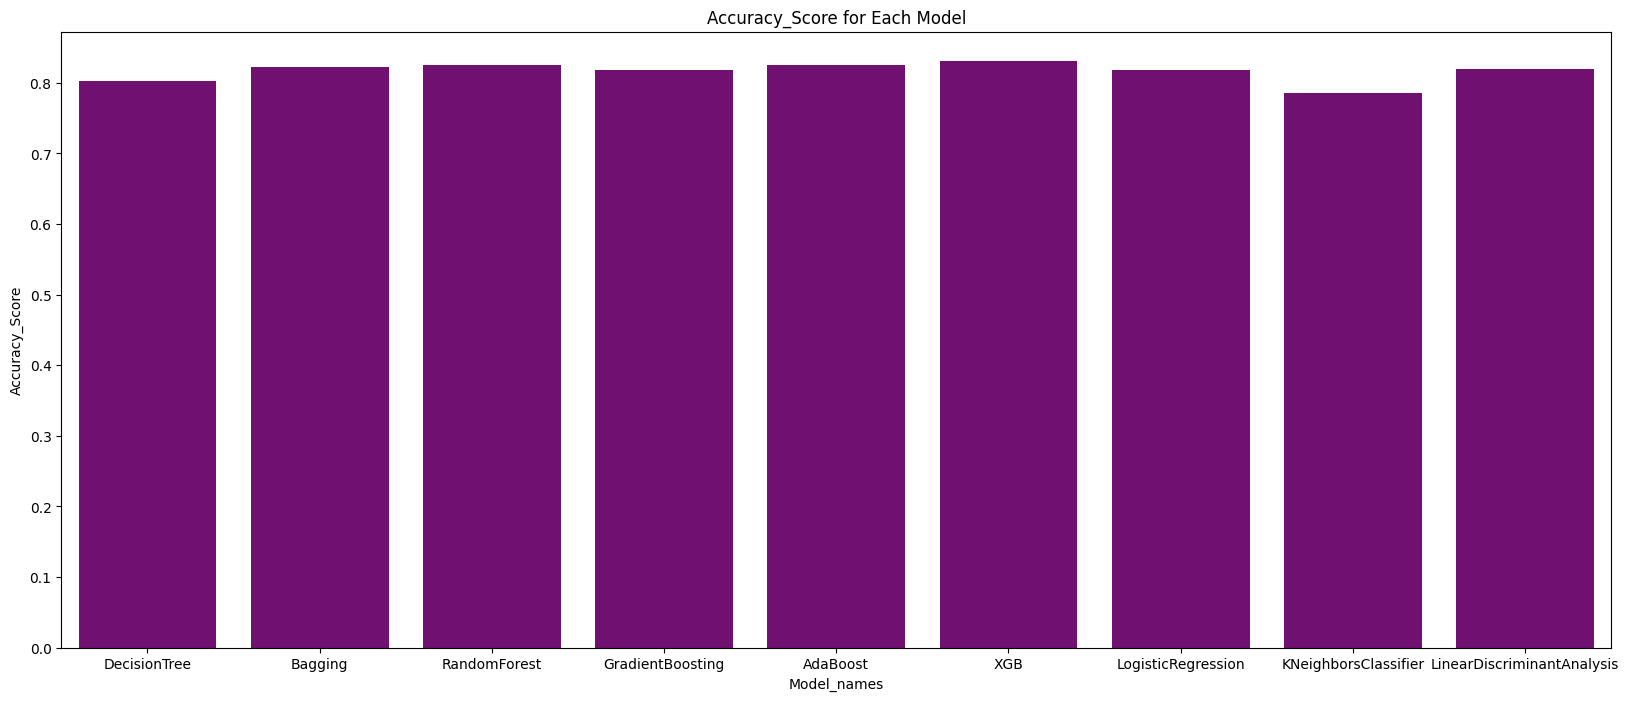

In [47]:
plt.figure(figsize=(20, 8))
sns.barplot(x=Model_names,y=Accuracy_Score,color='purple')
plt.xlabel("Model_names")
plt.ylabel("Accuracy_Score")
plt.title("Accuracy_Score for Each Model")

Text(0.5, 1.0, 'Precision_Score for Each Model')

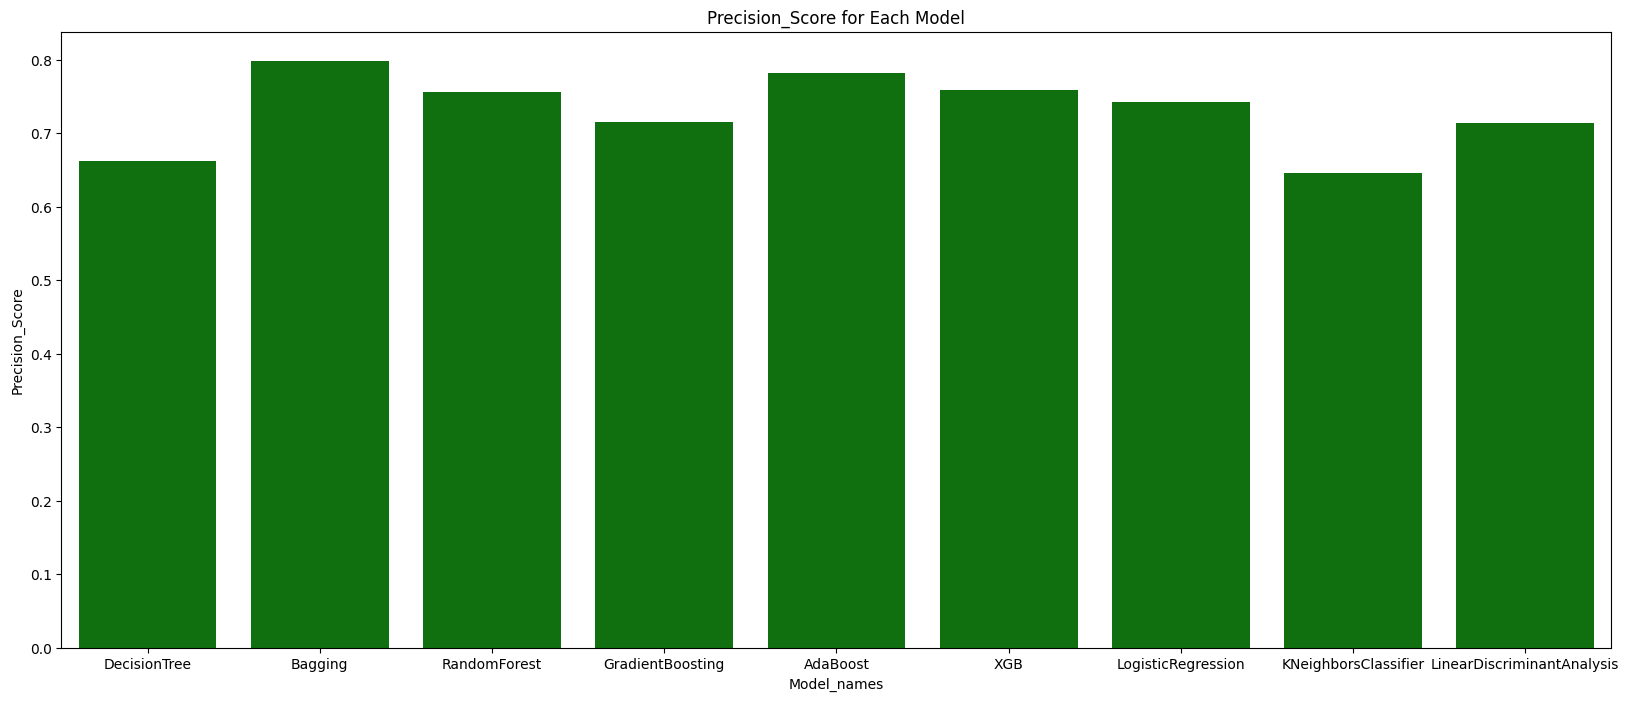

In [48]:
plt.figure(figsize=(20, 8))
sns.barplot(x=Model_names,y=Precision_Score,color='green')
plt.xlabel("Model_names")
plt.ylabel("Precision_Score")
plt.title("Precision_Score for Each Model")

Text(0.5, 1.0, 'Recall_score for Each Model')

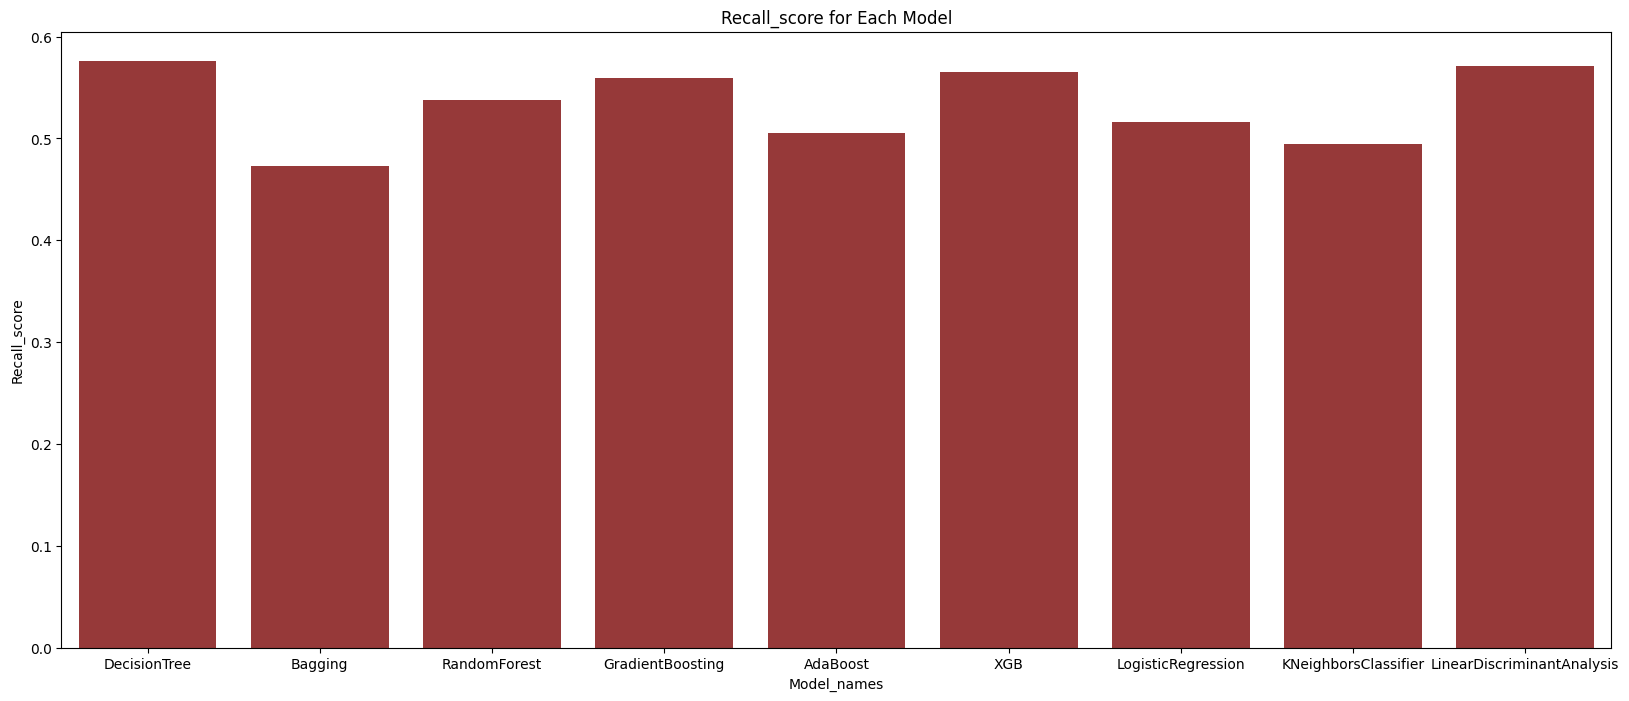

In [49]:
plt.figure(figsize=(20, 8))
sns.barplot(x=Model_names,y=Recall_score,color='brown')
plt.xlabel("Model_names")
plt.ylabel("Recall_score")
plt.title("Recall_score for Each Model")

# Selected Model
---
## XGBoost:
<i>Accuracy Score (Train):</i>  **86.69%**

<i>Accuracy Score (Test):</i>  **83.08%** 

<i>Precision Score (Test):</i>  **0.7591** 

<i>Recall Score (Test):</i>  **0.5652** 



# Predicting weather with independent values

**Trying with 5 predictions**

In [50]:
Weather=pd.DataFrame({'MinTemp':[19.5,17.5,16.9,18.3,18.6],
                       'MaxTemp':[22.4,20.2,24.3,26.4,25.3],
                       'Rainfall':[15.6,13.7,3.0,0.0,0.0],
                       'Evaporation':[6.2,5.4,3.200000,4.600000,4.200000],
                       'Sunshine':[0.0,2.2,8.7,11.1,4.5],
                       'Humidity9am':[92.0,70.0,81.0,80.0,70.0],
                       'Humidity3pm':[84.0,60.0,51.0,60.0,59.0],
                       'Pressure9am':[1017.6,65.3,1017.2,1013.4,1021.7],
                       'Pressure3pm':[1017.4,660.2,1016.5,1010.8,1019.4],
                       'Cloud9am':[8.0,7.0,7.0,3.0,7.0],
                       'Cloud3pm':[8.0,6.0,1.0,1.0,6.0],
                       'Temp9am':[20.7,19.3,18.4,21.3,21.2],
                       'Temp3pm':[20.9,17.5,23.3,25.2,23.8],
                       'RainToday_Yes':[1,0,1,0,0]})

In [51]:
predictions=grid_search_xgb.predict(Weather)

In [52]:
for i,prediction in enumerate(predictions):
        print(f'Prediction for entry {i + 1} flagged : {prediction}')
        if prediction==1:
            print(f'There is a \"rainfall\" Tomorrow because the prediction flagged {prediction}')
            print("*"*70)
        if prediction==0:
            print(f'There is  \"No rainfall\" Tomorrow because the prediction flagged {prediction}')
            print("*"*70)


Prediction for entry 1 flagged : 1
There is a "rainfall" Tomorrow because the prediction flagged 1
**********************************************************************
Prediction for entry 2 flagged : 1
There is a "rainfall" Tomorrow because the prediction flagged 1
**********************************************************************
Prediction for entry 3 flagged : 0
There is  "No rainfall" Tomorrow because the prediction flagged 0
**********************************************************************
Prediction for entry 4 flagged : 0
There is  "No rainfall" Tomorrow because the prediction flagged 0
**********************************************************************
Prediction for entry 5 flagged : 0
There is  "No rainfall" Tomorrow because the prediction flagged 0
**********************************************************************


# Questions  

## 1. Your views about the problem statement?
- The problem statement involves predicting rainfall in Sydney using machine learning models. Given the dataset covering weather-related variables from 2008 to 2017, there is an opportunity to leverage machine learning techniques to improve the accuracy of rainfall predictions. The problem statement use various classification models, including decision trees and ensemble methods. These models can use features such as temperature, humidity, precipitation, and pressure to predict whether it will rain the next day.											

## 2. What will be your approach to solving this task?
My approach to solving this task is as follows : 

**(A) Data Preprocessing** 
- convert RainToday and RainTomorrow column into dummy variables
- Replace Null values with mean of its 
- check for outliers in this dataset thier is no such outliers which affect the result 

**(B) Model Selcetion:**
- Trying various classification models, including Decision Trees and Ensemble methods (Random Forest, Gradient Boosting, AdaBoost, XGBoost).

**(C) Model Training and Evaluation:**
- Split the data into test and train datasets.
- Train the particular model on the training dataset.
- Evaluate their performance using metrics like accuracy, ROC AUC, recall, and precision.
- Select the model with the best performance.

**(D)Model Comparison:** 
- Compare the performance of different models to select the best one

**(E)Model Optimization:**
- use hyperparameter by gridsearchcv to improve model accuracy  

## 3. What were the available ML model options you had to perform this task?
**The available ML model options include:**
- Decision Trees
- Random Forest
- Gradient Boosting
- AdaBoost
- XGBoost
- Logistic Regression
- K-Nearest Neighbors
- Linear Discriminant Analysis

## 4. Which model’s performance is best and what could be the possible reason for that?
-
I have evaluated several classification models and assessed their performance on the test dataset. Here are the results:
---
**Logistic Regression:**
- Logistic Regression - Accuracy Score (Train): 83.81%
- Logistic Regression - Accuracy Score (Test): 81.73%
- Logistic Regression - ROC AUC Score (Test): 0.7241
- Logistic Regression - Recall Score (Test): 0.5163
- Logistic Regression - Precision Score (Test): 0.7422
---
**K-Nearest Neighbors:**
- K-Nearest Neighbors - Accuracy Score (Train): 85.94%
- K-Nearest Neighbors - Accuracy Score (Test): 78.59%
- K-Nearest Neighbors - ROC AUC Score (Test): 0.6956
- K-Nearest Neighbors - Recall Score (Test): 0.4946
- K-Nearest Neighbors - Precision Score (Test): 0.6454
---
**Linear Discriminant Analysis:**
- Linear Discriminant Analysis - Accuracy Score (Train): 83.36%
- Linear Discriminant Analysis - Accuracy Score (Test): 81.88%
- Linear Discriminant Analysis - ROC AUC Score (Test): 0.7419
- Linear Discriminant Analysis - Recall Score (Test): 0.5707
- Linear Discriminant Analysis - Precision Score (Test): 0.7143
--- 
**Decision Tree:**
- Decision Tree - Accuracy Score (Train): 82.72%
- Decision Tree - Accuracy Score (Test): 80.23%
- Decision Tree - ROC AUC Score (Test): 0.7323
- Decision Tree - Recall Score (Test): 0.5761
- Decision Tree - Precision Score (Test): 0.6625
---
**Random Forest:**
- Random Forest - Accuracy Score (Train): 91.38%
- Random Forest - Accuracy Score (Test): 82.48%
- Random Forest - ROC AUC Score (Test): 0.7360
- Random Forest - Recall Score (Test): 0.5380
- Random Forest - Precision Score (Test): 0.7557
---
**Gradient Boosting:**
- Gradient Boosting - Accuracy Score (Train): 91.86%
- Gradient Boosting - Accuracy Score (Test): 81.73%
- Gradient Boosting - ROC AUC Score (Test): 0.7375
- Gradient Boosting - Recall Score (Test): 0.5598
- Gradient Boosting - Precision Score (Test): 0.7153
---  
**AdaBoost:**
- AdaBoost - Accuracy Score (Train): 84.45%
- AdaBoost - Accuracy Score (Test): 82.48%
- AdaBoost - ROC AUC Score (Test): 0.7259
- AdaBoost - Recall Score (Test): 0.5054
- AdaBoost - Precision Score (Test): 0.7815
--- 
**XGBoost:**
- XGBoost - Accuracy Score (Train): 86.69%
- XGBoost - Accuracy Score (Test): 83.08%
- XGBoost - ROC AUC Score (Test): 0.7485
- XGBoost - Recall Score (Test): 0.5652
- XGBoost - Precision Score (Test): 0.7591
---
**Best Overall Model:**

<b>XGBoost</b> stands out as the best overall model based on the metrics:
- High Accuracy: <b>83.08%</b>, which is the highest among the models listed.
- Strong Precision Score: <b>0.7591</b>, indicating that it performs well in predicting positive cases correctly.
- Highest ROC AUC Score: <b>0.7485</b>, indicating it has the best performance in distinguishing between classes.
- Good Recall Score: <b>0.5652</b>, though it’s not the highest, it provides a good balance with precision.
---
While <b>XGBoost</b> excels in several important areas, the best model can depend on the specific trade-offs that are willing to make between precision and recall. 
- If capturing as many positives as possible is crucial, then considering the model with higher recall scores are ideal, like <b>Linear Discriminant Analysis</b> or <b>Decision Tree</b>. 
- If precision is more important, <b>AdaBoost</b> or <b>XGBoost</b> would be better choices.








## 5. What steps can you take to improve this selected model’s performance even further?

To further enhance the performance of the selected model, I will take the following steps: 

**GridSearchCV for Tree Regression, Bagging, Gradient Boosting, Random Forest, AdaBoost, XGBoost, Logistic Regression, and K-Nearest Neighbors:**

1. **Model Selection and Evaluation**
2. **Hyperparameter Tuning**
3. **Feature Engineering**
4. **Ensemble Methods**
5. **Cross-Validation**
6. **Data Quality and Quantity**
7. **Regularization**
8. **Advanced Techniques**
9. **Post-Processing**
10. **Error Analysis**



<div style="text-align:center"> <h1>***Thank You***</h1> </div>